In [1]:
import pandas as pd 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data = pd.read_csv('Dataset/BERT.csv')
data.head()

,created_at,full_text,sentiment
0,2023-09-24 03:59:53+00:00,"['gue', 'kasi', 'kuping', 'mbak', 'translator'...",3
1,2023-09-24 03:53:01+00:00,"['kerja', 'enak', 'deket', 'suami', 'amp', 'ke...",3
2,2023-09-24 03:32:30+00:00,"['umr', 'plus', 'bonus', 'asuransi', 'sehat']",3
3,2023-09-24 01:30:32+00:00,"['baca', 'tanda', 'bintang', 'syarat', 'laku',...",2
4,2023-09-23 17:39:04+00:00,"['buatin', 'akun', 'dana', 'pensiun', 'orang',...",3


In [3]:
data.drop(['created_at'], axis=1, inplace=True)

In [4]:
data.head()

,full_text,sentiment
0,"['gue', 'kasi', 'kuping', 'mbak', 'translator'...",3
1,"['kerja', 'enak', 'deket', 'suami', 'amp', 'ke...",3
2,"['umr', 'plus', 'bonus', 'asuransi', 'sehat']",3
3,"['baca', 'tanda', 'bintang', 'syarat', 'laku',...",2
4,"['buatin', 'akun', 'dana', 'pensiun', 'orang',...",3


<Axes: xlabel='sentiment'>

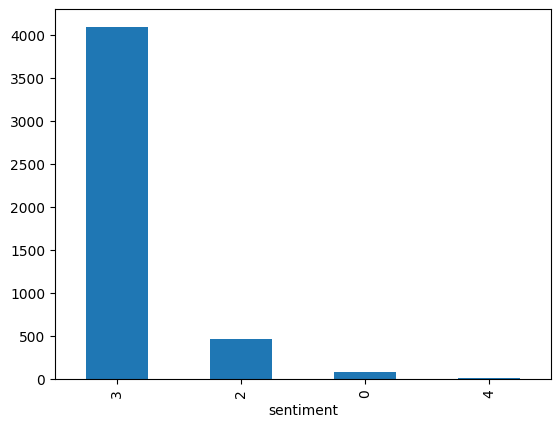

In [6]:
data['sentiment'].value_counts().plot(kind='bar')

In [7]:
# menampilkan 10 tweet yang bersentimen nilai 3
data[data['sentiment']==3].head(10)

,full_text,sentiment
0,"['gue', 'kasi', 'kuping', 'mbak', 'translator'...",3
1,"['kerja', 'enak', 'deket', 'suami', 'amp', 'ke...",3
2,"['umr', 'plus', 'bonus', 'asuransi', 'sehat']",3
4,"['buatin', 'akun', 'dana', 'pensiun', 'orang',...",3
5,"['tenang', 'asuransi', 'wajib', 'jalan', 'peri...",3
7,"['generasi', 'milenial', 'butuh', 'asuransi', ...",3
8,"['semenjak', 'nikah', 'sadar', 'ndo', 'klo', '...",3
9,"['tenaga', 'sehat', 'kebumen', 'cocok', 'konsu...",3
11,"['beasiswa', 'korea', 'gks', 'jenjang', 's', '...",3
13,"['alam', 'harga', 'premi', 'beda', 'beli', 'as...",3


<Axes: xlabel='sentiment'>

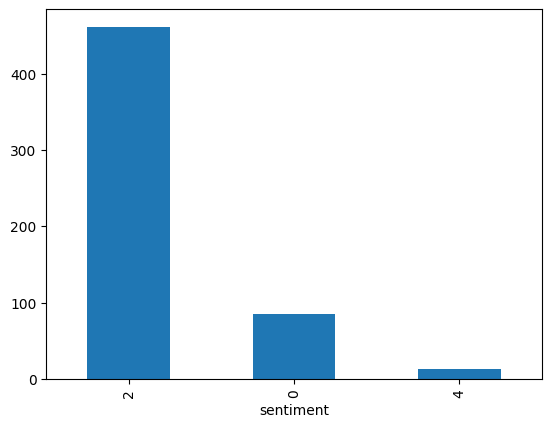

In [8]:
# menghitung jumlah data jika nilai sentimen 3 tidak dihitung
data_test = data[data['sentiment']!=3]
data_test['sentiment'].value_counts().plot(kind='bar')

In [9]:
# multi class classification dengan one vs rest classifier model svm
X = data['full_text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# menentukan c dan gamma terbaik untuk model svm dengan data teks 
# menggunakan grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [12]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(SVC())),
])

In [13]:
parameters = {
    'tfidf__max_df': [0.25, 0.5, 0.75],
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],
    'clf__estimator__C': [1, 10, 100],
    'clf__estimator__gamma': [0.1, 0.01, 0.001],
}


In [14]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf',
                                        OneVsRestClassifier(estimator=SVC()))]),
             n_jobs=2,
             param_grid={'clf__estimator__C': [1, 10, 100],
                         'clf__estimator__gamma': [0.1, 0.01, 0.001],
                         'tfidf__max_df': [0.25, 0.5, 0.75],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=3)

In [15]:
print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(max_df=0.25, ngram_range=(1, 3), stop_words='english')), ('clf', OneVsRestClassifier(estimator=SVC(C=10, gamma=0.1)))]


In [16]:
# menampilkan hasil grid search
print("Best score: %0.3f" % grid_search_tune.best_score_)
print("Best parameters set:")
best_parameters = grid_search_tune.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.892
Best parameters set:
	clf__estimator__C: 10
	clf__estimator__gamma: 0.1
	tfidf__max_df: 0.25
	tfidf__ngram_range: (1, 3)


In [17]:
# menampilkan hasil prediksi
predictions = grid_search_tune.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8839957035445757


In [20]:
# tfidf vectorizer bahasa indonesia
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from nltk.corpus import stopwords

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmer_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words

tfidf = TfidfVectorizer(tokenizer=stemmer_tokenizer, stop_words=stopwords.words('indonesian'), ngram_range=(1,3), max_df=0.25)

In [22]:
# pipeline untuk model svm dengan tfidf vectorizer bahasa indonesia
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', OneVsRestClassifier(SVC(C=10, gamma=0.1))),
])

In [23]:
# melatih model
pipeline.fit(X_train, y_train)

c:\Users\farha\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\farha\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arti', 'asa', 'buah', 'bum', 'enak', 'hadap', 'ikan', 'ira', 'jenak', 'kali', 'kena', 'kerja', 'khusus', 'laku', 'langsung', 'lihat', 'maksud', 'masuk', 'mena', 'nyata', 'olah', 'orang', 'rupa', 'sampa', 'sangkut', 'sekal', 'sekira', 'sin', 'tuju', 'upa', 'utama'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, ngram_range=(1, 3),
                                 stop_words=['ada', 'adalah', 'adanya',
                                             'adapun', 'agak', 'agaknya',
                                             'agar', 'akan', 'akankah', 'akhir',
                                             'akhiri', 'akhirnya', 'aku',
                                             'akulah', 'amat', 'amatlah',
                                             'anda', 'andalah', 'antar',
                                             'antara', 'antaranya', 'apa',
                                             'apaan', 'apabila', 'apakah',
                                             'apalagi', 'apatah', 'artinya',
                                             'asal', 'asalkan', ...],
                                 tokenizer=<function stemmer_tokenizer at 0x000001D00D85A160>)),
                ('clf', OneVsRestClassifier(estimator=SVC(C=10, gamma=0.1)))])

In [24]:
# menampilkan hasil prediksi
predictions = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8850698174006445


In [25]:
# model random forest
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', RandomForestClassifier()),
])

In [26]:
# melatih model
pipeline.fit(X_train, y_train)

c:\Users\farha\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, ngram_range=(1, 3),
                                 stop_words=['ada', 'adalah', 'adanya',
                                             'adapun', 'agak', 'agaknya',
                                             'agar', 'akan', 'akankah', 'akhir',
                                             'akhiri', 'akhirnya', 'aku',
                                             'akulah', 'amat', 'amatlah',
                                             'anda', 'andalah', 'antar',
                                             'antara', 'antaranya', 'apa',
                                             'apaan', 'apabila', 'apakah',
                                             'apalagi', 'apatah', 'artinya',
                                             'asal', 'asalkan', ...],
                                 tokenizer=<function stemmer_tokenizer at 0x000001D00D85A160>)),
                ('clf', RandomForestClassifier())])

In [27]:
# menampilkan hasil prediksi
predictions = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8796992481203008
